# Exponential Smoothing

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing as HWES

In [11]:
df = pd.read_csv('F:/Course/youtube/41. Eksponential Smoothing/retail_sales_used_car_dealers_us_1992_2020.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [12]:
df.head()

,Retail_Sales
DATE,
1992-01-01,1744
1992-01-02,1990
1992-01-03,2177
1992-01-04,2601
1992-01-05,2171


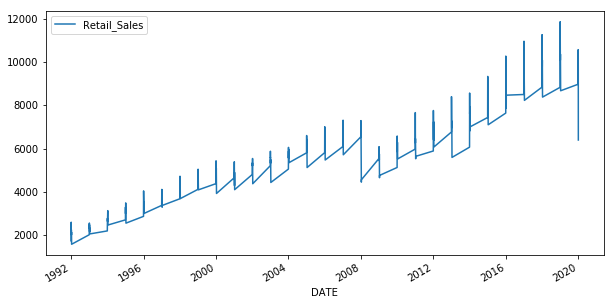

In [13]:
df.plot(figsize=(10,5))
plt.show()

In [14]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [15]:
import warnings
warnings.filterwarnings("ignore")

## SES

In [16]:
fit1 = SimpleExpSmoothing(df_train).fit(smoothing_level=0.2,optimized=False)
print(fit1.summary())
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')

                       SimpleExpSmoothing Model Results                       
Dep. Variable:           Retail_Sales   No. Observations:                  328
Model:             SimpleExpSmoothing   SSE                      119874850.760
Optimized:                      False   AIC                           4205.334
Trend:                           None   BIC                           4212.920
Seasonal:                        None   AICC                          4205.458
Seasonal Periods:                None   Date:                 Tue, 22 Dec 2020
Box-Cox:                        False   Time:                         07:14:12
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              1744.0000                

In fit3, we use the auto-optimization that allow statsmodels to automatically find an optimized value for us. This is the recommended approach.

In [17]:
fit2 = SimpleExpSmoothing(df_train).fit()
print(fit2.summary())
fcast2 = fit2.forecast(12).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

                       SimpleExpSmoothing Model Results                       
Dep. Variable:           Retail_Sales   No. Observations:                  328
Model:             SimpleExpSmoothing   SSE                       92167770.776
Optimized:                       True   AIC                           4119.123
Trend:                           None   BIC                           4126.709
Seasonal:                        None   AICC                          4119.247
Seasonal Periods:                None   Date:                 Tue, 22 Dec 2020
Box-Cox:                        False   Time:                         07:15:01
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9604651                alpha                 True
initial_level              1744.0000                

## Holt's Method

In [18]:
fit1 = Holt(df_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
print(fit1.summary())
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

                              Holt Model Results                              
Dep. Variable:           Retail_Sales   No. Observations:                  328
Model:                           Holt   SSE                      111088309.338
Optimized:                      False   AIC                           4184.366
Trend:                       Additive   BIC                           4199.538
Seasonal:                        None   AICC                          4184.627
Seasonal Periods:                None   Date:                 Tue, 22 Dec 2020
Box-Cox:                        False   Time:                         07:15:53
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8000000                alpha                False
smoothing_trend            0.2000000                

In [19]:
print(fcast1)

328    10849.433994
329    11055.548523
330    11261.663052
331    11467.777581
332    11673.892110
333    11880.006639
334    12086.121168
335    12292.235697
336    12498.350226
337    12704.464755
338    12910.579283
339    13116.693812
Name: Holt's linear trend, dtype: float64


## Holt Winters

In [20]:
#additive
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       22756985.616
Optimized:                         True   AIC                           3688.337
Trend:                         Additive   BIC                           3749.025
Seasonal:                      Additive   AICC                          3690.551
Seasonal Periods:                    12   Date:                 Tue, 22 Dec 2020
Box-Cox:                          False   Time:                         07:17:22
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4013376                alpha                 True
smoothing_trend          

In [21]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23449173.977
Optimized:                         True   AIC                           3698.165
Trend:                         Additive   BIC                           3758.853
Seasonal:                Multiplicative   AICC                          3700.379
Seasonal Periods:                    12   Date:                 Tue, 22 Dec 2020
Box-Cox:                          False   Time:                         07:17:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3941808                alpha                 True
smoothing_trend          

In [24]:
sales_forecast = fitted.forecast(steps=12)

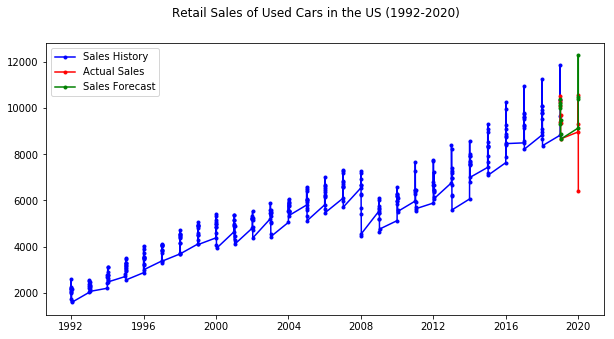

In [25]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

In [ ]:
#from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

###### yang atas : https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572

###### https://www.kaggle.com/krish525/holtwinters

In [ ]:
!pip install timeseries

In [ ]:
pip install time-series

In [ ]:
pip install statsmodels --upgrade

In [ ]:
from time_series import TimeSeries

# Imports for data visualization
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter
from matplotlib import dates as mpld

register_matplotlib_converters()

In [ ]:
import pandas as pd
data = pd.read_csv('F:/Course/youtube/41. Eksponential Smoothing/data_hw.csv')
ts = TimeSeries(data, train_size=0.8)

print("Sales Data")
print(ts.data.describe())

print("Head and Tail of the time series")
print(ts.data.head(5).iloc[:,1])
print(ts.data.tail(5).iloc[:,1])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(ts.data.iloc[:,1],period=12,model='additive')
result_add.plot()
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(date_format)

result_mul = seasonal_decompose(ts.data.iloc[:,1],period=12,model='multiplicative')
result_mul.plot()
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Scaling down the data by a factor of 1000
ts.set_scale(1000)

# Training the model
model = ExponentialSmoothing(ts.train,trend='additive',seasonal='additive',seasonal_periods=12).fit(damping_slope=1)
plt.plot(ts.train.index,ts.train,label="Train")
plt.plot(ts.test.index,ts.test,label="Actual")

# Create a 5 year forecast
plt.plot(model.forecast(60),label="Forecast")

plt.legend(['Train','Actual','Forecast'])
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Sales Data Analysis (2013-2016)")
plt.xlabel("Time")
plt.ylabel("Sales (x1000)")
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ts = TimeSeries(data, train_size=0.8)
# Additive model
model_add = ExponentialSmoothing(ts.data.iloc[:,1],trend='additive',seasonal='additive',seasonal_periods=12,damped=True).fit(damping_slope=0.98)
prediction = model_add.predict(start=ts.data.iloc[:,1].index[0],end=ts.data.iloc[:,1].index[-1])

plt.plot(ts.data.iloc[:,1].index,ts.data.iloc[:,1],label="Train")
plt.plot(ts.data.iloc[:,1].index,prediction,label="Model")
plt.plot(model_add.forecast(60))

plt.legend(['Actual','Model','Forecast'])
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Sales Data Analysis (2013-2016)")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()


# Multiplicative model
model_mul = ExponentialSmoothing(ts.data.iloc[:,1],trend='additive',seasonal='multiplicative',seasonal_periods=12,damped=True).fit()
prediction = model_mul.predict(start=ts.data.iloc[:,1].index[0],end=ts.data.iloc[:,1].index[-1])

plt.plot(ts.data.iloc[:,1].index,ts.data.iloc[:,1],label="Train")
plt.plot(ts.data.iloc[:,1].index,prediction,label="Model")
plt.plot(model_mul.forecast(60))
plt.legend(['Actual','Model','Forecast'])
plt.gcf().autofmt_xdate()
date_format = mpld.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Sales Data Analysis (2013-2016)")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.show()

###### https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df.plot.line(x = 'YEAR_MONTH_SALE_DATE', 
             y = 'COUNT_YEAR_MONTH_SALE_SAMPLE')
plt.show()

In [ ]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
#fcast1.plot(marker='o', color='blue', legend=True)
#fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(df).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
#fcast2.plot(marker='o', color='red', legend=True)
#fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(df).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
#fcast3.plot(marker='o', color='green', legend=True)
#fit3.fittedvalues.plot(marker='o', color='green')

#plt.show()

In [ ]:
#holt

fit1 = Holt(saledata).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(saledata, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(saledata, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

In [ ]:
#holt winters
fit1 = ExponentialSmoothing(saledata, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(saledata, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(saledata, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(saledata, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")
